
# ASSIGNMENT : IRIS MULTI-CLASS CLASSIFICATION

###### Purpose :
To predict the species of flower .
###### Description :
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
###### Requirements :
1) Code must be in tf 2.0 .

2) Accuracy must be in between 95-97% .

3) Model shouldn't be Overfit (You can add drop out layer for this) .

# STEP 1 : Load all the necessary libraries


In [175]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models,layers,optimizers,utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# STEP 2 : Data Preparation

In [176]:
iris_data=pd.read_csv("D:/c/Desktop/PIAIC/Models/dataset/iris.csv")


In [177]:
iris=iris_data.sample(frac=1).values

In [178]:
len(iris)

150

In [179]:
x_train=iris[:90,:4].astype('float')
y_train=iris[:90,4]
x_test=iris[90:,:4].astype('float')
y_test=iris[90:,4]

In [180]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
le = LabelEncoder()
train_label= le.fit_transform(y_train)
test_label= le.fit_transform(y_test)


In [181]:
print(test_label)

[0 1 2 0 0 2 0 2 0 1 1 0 2 2 1 2 1 2 2 1 1 1 1 2 2 1 1 1 2 2 2 0 2 0 1 2 0
 2 0 0 0 2 1 2 2 0 0 0 2 0 1 1 1 2 2 2 0 1 0 0]


# One hot encoding

In [182]:
from keras.utils import to_categorical
train_labels = to_categorical(train_label)
test_labels = to_categorical(test_label)

In [183]:
print(test_labels[1])

[0. 1. 0.]


# Model Architecture


In [184]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
#optimizers.RMSprop(lr=0.001)
def build_model():
    network = models.Sequential() 
    #network.add(layers.Dropout(0.3))
    #,kernel_regularizer=regularizers.l2(0.001)
    network.add(layers.Dense(20, activation='relu',input_shape=(4,)))
    network.add(layers.Dense(10, activation='relu'))
    #network.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
    network.add(layers.Dense(3, activation='softmax'))
    
    network.compile(optimizer='RMSprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
    return network

# K-FOLD

In [185]:
k=4
num_val_samples=len(x_train)//k
num_epochs=100
all_scores=[]
all_mae_histories=[]
for i in range(k):
    print("proccessing fold #",i)
    val_data=x_train[i*num_val_samples:(i+1)*num_val_samples]
    val_labels=train_labels[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([x_train[:i*num_val_samples],x_train[(i+1)*num_val_samples:]],axis=0)
    partial_train_labels=np.concatenate([train_labels[:i*num_val_samples],train_labels[(i+1)*num_val_samples:]],axis=0)
    model=build_model()
    history=network.fit(partial_train_data, partial_train_labels,
                      epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)
    mae_history = history.history['accuracy']
    all_mae_histories.append(mae_history)

proccessing fold # 0
proccessing fold # 1
proccessing fold # 2
proccessing fold # 3


In [186]:
avg_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('all fold validation error',all_scores)
print('Mean of all fold validation error',np.mean(all_scores))
print('Average mae history',avg_mae_history)

all fold validation error [0.22727273404598236, 0.3636363744735718, 0.0, 0.13636364042758942]
Mean of all fold validation error 0.1818181872367859
Average mae history [0.9669118, 0.97794116, 0.97794116, 0.9705882, 0.9669118, 0.97794116, 0.97794116, 0.9742647, 0.9742647, 0.97794116, 0.9669118, 0.9705882, 0.97794116, 0.9705882, 0.97794116, 0.9705882, 0.97794116, 0.9742647, 0.97794116, 0.97794116, 0.9742647, 0.97794116, 0.9742647, 0.9742647, 0.97794116, 0.9705882, 0.97794116, 0.9742647, 0.9742647, 0.9742647, 0.9852941, 0.9742647, 0.9705882, 0.9816176, 0.9705882, 0.9742647, 0.9742647, 0.9742647, 0.9705882, 0.97794116, 0.97794116, 0.97794116, 0.9816176, 0.97794116, 0.97794116, 0.9705882, 0.9705882, 0.9705882, 0.9742647, 0.9816176, 0.97794116, 0.96691173, 0.9816176, 0.9742647, 0.97794116, 0.9852941, 0.9742647, 0.97794116, 0.9742647, 0.9742647, 0.9816176, 0.96323526, 0.9742647, 0.9742647, 0.9742647, 0.97794116, 0.9705882, 0.9816176, 0.97794116, 0.96691173, 0.9742647, 0.9816176, 0.97794116, 0.

In [161]:
#hist=network.fit(x_train ,train_labels ,batch_size=20, epochs=25,validation_split=0.1)

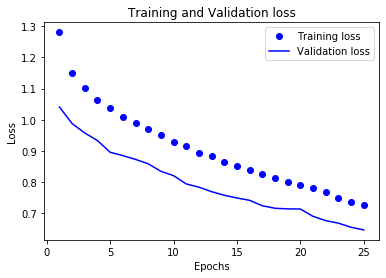

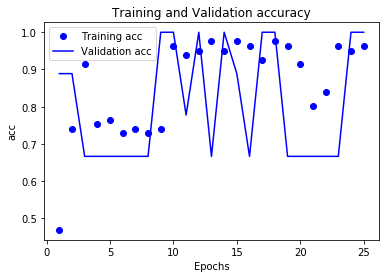

In [162]:
import matplotlib.pyplot as plt
loss_values=hist.history['loss']
val_loss_values=hist.history['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf
acc_values=hist.history['accuracy']
val_acc_values=hist.history['val_accuracy']
epochs=range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Prediction

In [163]:
evaluation = network.evaluate(x_test,  test_labels)

60/60 [==============================] - 0s 800us/step


In [187]:
model = build_model()
model.fit(x_train, train_labels,
          epochs=80, batch_size=16, verbose=0)


In [188]:
evaluation= model.evaluate(x_test, test_labels)
evaluation

60/60 [==============================] - 0s 400us/step


[0.24047336677710215, 0.9666666388511658]

# Saving Model

In [308]:
network.save('Iris_dataset.h5')

# Model Reload for Prediction

In [309]:
from tensorflow.keras.models import load_model
model=load_model('Iris_dataset.h5')


# Prediction

In [316]:
i = 59
prediction =  model.predict_classes(x_test[i].reshape(1,4))

In [317]:
if prediction == 0:
  print("The data is :",x_test[i],"and I have predicted that it's a",prediction,"i.e Iris-setosa")
  print("Actual data :",x_test[i] , "actual label :",y_test[i])

elif prediction == 1:
  print("The data is :",x_test[i],"and I have predicted that it's a",prediction,"i.e Iris-versicolor")
  print("Actual data :",x_test[i] , "actual label :",y_test[i])

else:
  print("The data is :",x_test[i],"and I have predicted that it's a",prediction,"i.e Iris-virginica")
  print("Actual data :",x_test[i] , "actual label :",y_test[i])


The data is : [6.9 3.2 5.7 2.3] and I have predicted that it's a [2] i.e Iris-virginica
Actual data : [6.9 3.2 5.7 2.3] actual label : Virginica
